<a href="https://colab.research.google.com/github/eminshall/QuantFinanceWorkbooks/blob/main/Linear_Regression_for_Market_Movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import os
import random
import pandas as pd
import numpy as np

from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
os.environ['PYTHONHASHSEED'] = '0'

<ipython-input-1-be63c1abcfab>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Linear Regression Overview

In [5]:
# Creates evenly spaced grid of floats for x values between 0 , 10
x = np.linspace(0, 10)

In [6]:
# Fixes seed values for all relevant random number generators
def set_seeds(seed=10):
  random.seed(seed)
  np.random.seed(seed)

set_seeds()

In [8]:
# Generates random data for the y values
y = x + np.random.standard_normal(len(x))

In [9]:
# Numpy's OLS (Ordinary Least Square) Linear Regression
reg = np.polyfit(x, y, deg=1)

In [10]:
# Optimal Paramater Values
reg

array([0.97956686, 0.2046519 ])

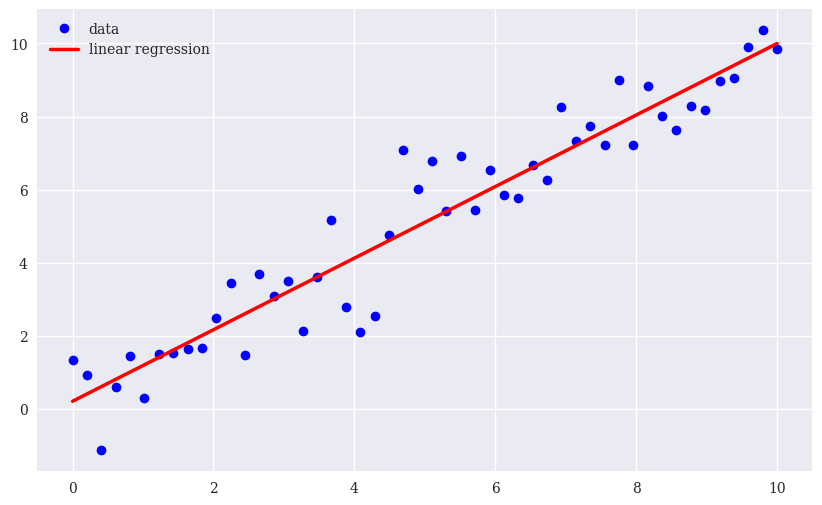

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data') #Plots Data
plt.plot(x, np.polyval(reg,x), 'r', lw=2.5,
         label = 'linear regression') #Plots regression line
plt.legend(loc=0)

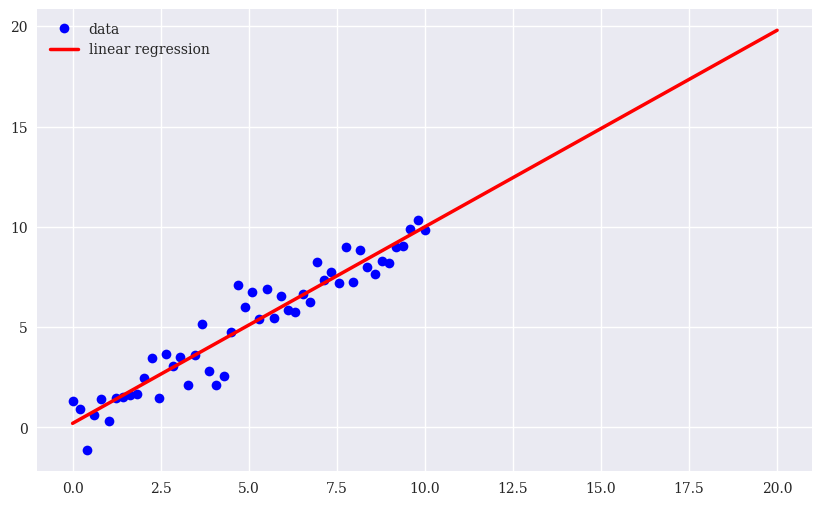

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data') #Plots Data
xn = np.linspace(0, 20) #We can predict the direction by increasing our gird space
plt.plot(xn, np.polyval(reg,xn), 'r', lw=2.5,
         label = 'linear regression') #Plots regression line
plt.legend(loc=0)

# Basic Price Prediction with Linear Regression

In [15]:
#Pretend 0 - 11 is the timeseries data
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
#Create an array with the appropriate dimensions
lags = 3
m = np.zeros((lags + 1, len(x)-lags))

In [17]:
#Defines the target values (dependent variable)
m[lags] = x[lags:]
#Creates the independent variables
for i in range(lags):
  m[i] = x[i:i-lags]

In [18]:
#Transpose the array 
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

First three columns are the known values. Fourth Column is what needs to be predicted.

In [19]:
# We use linalg (linear algebra) & lstsq (least square) for our linear regression
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [20]:
#np.dot makes the prediction, reg is our regression paramaters
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])